In [18]:
import pandas as pd

data = pd.read_csv('authors.csv')
data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [19]:
data.iloc[0]['text']

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [20]:
data.shape

(19579, 3)

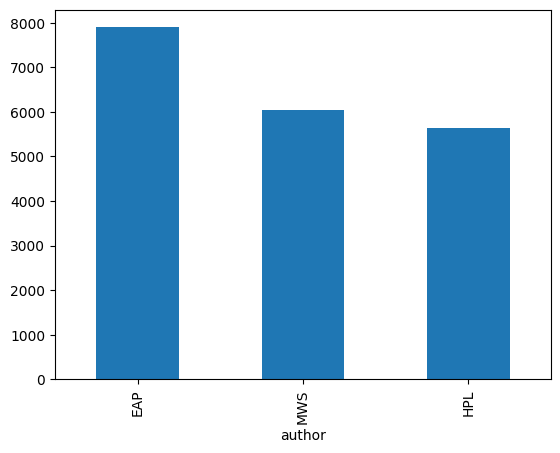

In [21]:
import matplotlib.pyplot as plt

ase = data['author'].value_counts()
ase.plot(kind='bar')
plt.show()

#Remove punctuation


In [22]:

txt = "Good night Sam!"

x = 'am'
y = 'an'
z = 'odht'

mytable = str.maketrans(x, y, z)

print(txt.translate(mytable))

G nig San!


#Normalization

In [23]:
import string
string.punctuation

def remove_punctuation(text):
    flag = str.maketrans('', '', string.punctuation)
    removed = text.translate(flag)
    new = removed.lower()
    return new

In [24]:
data['text'] = data['text'].apply(remove_punctuation)

In [25]:
data.iloc[0]['text']

'this process however afforded me no means of ascertaining the dimensions of my dungeon as i might make its circuit and return to the point whence i set out without being aware of the fact so perfectly uniform seemed the wall'

#Stopwords Removal

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [28]:
def remove_stop_words(text):
  words = []
  wordlist = nltk.word_tokenize(text)
  for word in wordlist:
    if word not in sw:
      words.append(word)
  return ' '.join(words)


In [29]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [30]:
data['text'] = data['text'].apply(remove_stop_words)

In [31]:
data.iloc[0]['text']

'process however afforded means ascertaining dimensions dungeon might make circuit return point whence set without aware fact perfectly uniform seemed wall'

#Stemming

In [32]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

def stemming(text):
  stemmed = []
  words = nltk.word_tokenize(text)
  for word in words:
    stemmed.append(stemmer.stem(word))
  return ' '.join(stemmed)

In [33]:
data['text'] = data['text'].apply(stemming)

In [34]:
data.iloc[0]['text']

'process howev afford mean ascertain dimens dungeon might make circuit return point whenc set without awar fact perfect uniform seem wall'

#TF-IDF Vectorization

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['text'])
array = vectors.todense()

In [36]:
array[:5]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
df = pd.DataFrame(array)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15131,15132,15133,15134,15135,15136,15137,15138,15139,15140
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.266318,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df.shape

(19579, 15141)